In [2]:
import pandas as pd
import numpy as np

file = "C:/Users/mkhandoker/OneDrive - Mackenzie Health/1. DSI/1. Team Project/healthcare-dataset-stroke-data.csv"
df = pd.read_csv(file)

In [20]:
df.drop(columns=['id'], inplace = True)

In [3]:
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [4]:
#reading the first 5 rows
print ("the default first 5 rows: -\n")
df.head()

the default first 5 rows: -



,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [5]:
df.gender.value_counts()

gender
Female    2994
Male      2115
Other        1
Name: count, dtype: int64

In [6]:
# Drop the 'other' category in the gender column
other = df[df['gender'] == 'Other'].index
df.drop(other, axis=0, inplace= True)
df.gender.value_counts()
     

gender
Female    2994
Male      2115
Name: count, dtype: int64

In [7]:
# Age column
df.age.value_counts()

age
78.00    102
57.00     95
52.00     90
54.00     87
51.00     86
        ... 
1.40       3
0.48       3
0.16       3
0.40       2
0.08       2
Name: count, Length: 104, dtype: int64

c:\Users\mkhandoker\AppData\Local\anaconda3A\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


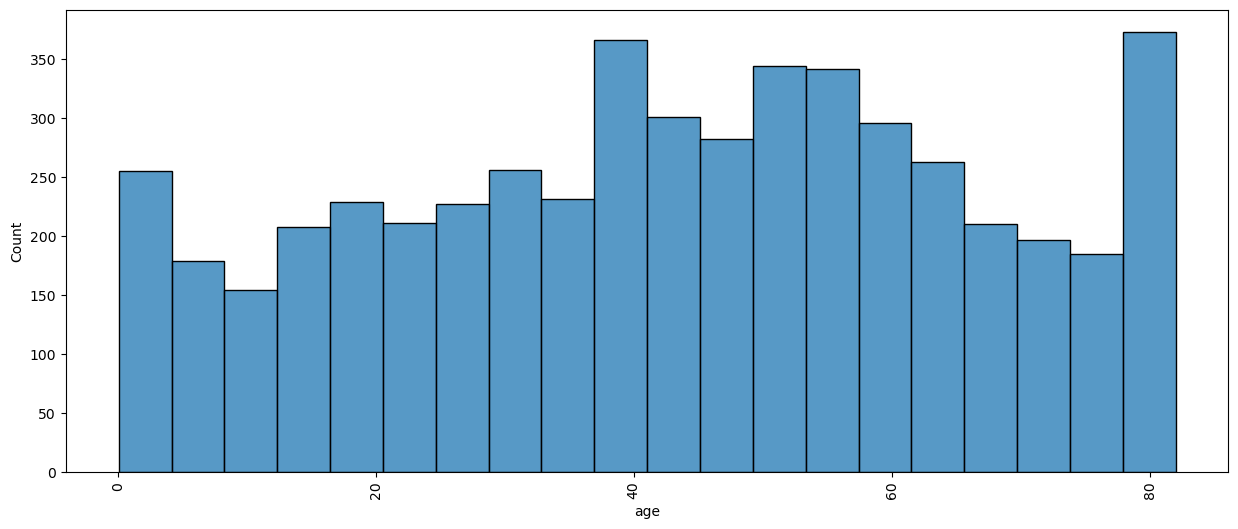

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px

plt.figure(figsize=(15,6))
sns.histplot(df['age'])
plt.xticks(rotation=90)
plt.show()

In [9]:
import seaborn as sns

c:\Users\mkhandoker\AppData\Local\anaconda3A\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\mkhandoker\AppData\Local\anaconda3A\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\mkhandoker\AppData\Local\anaconda3A\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


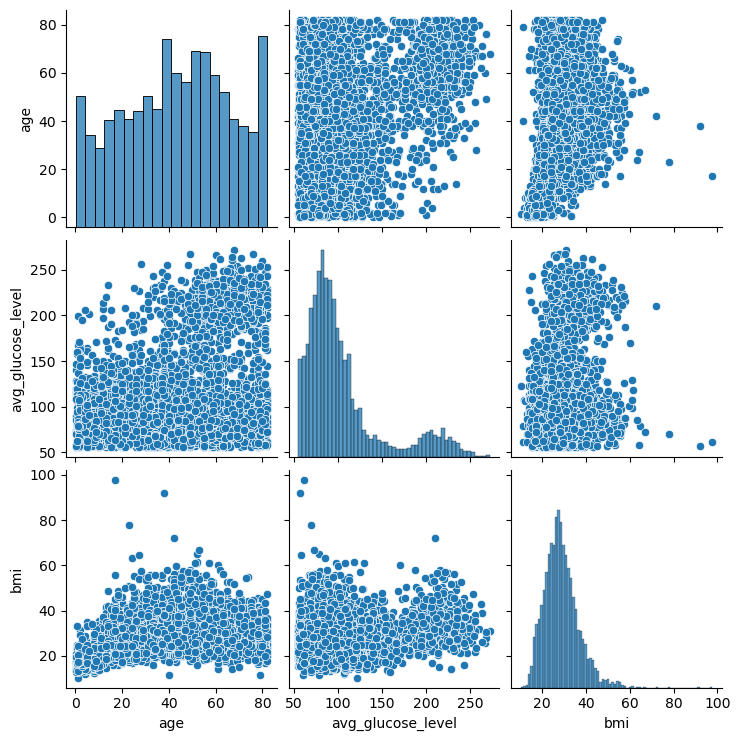

In [10]:
sns.pairplot(df[['age','avg_glucose_level','bmi']])

BMI looks normal distribution!

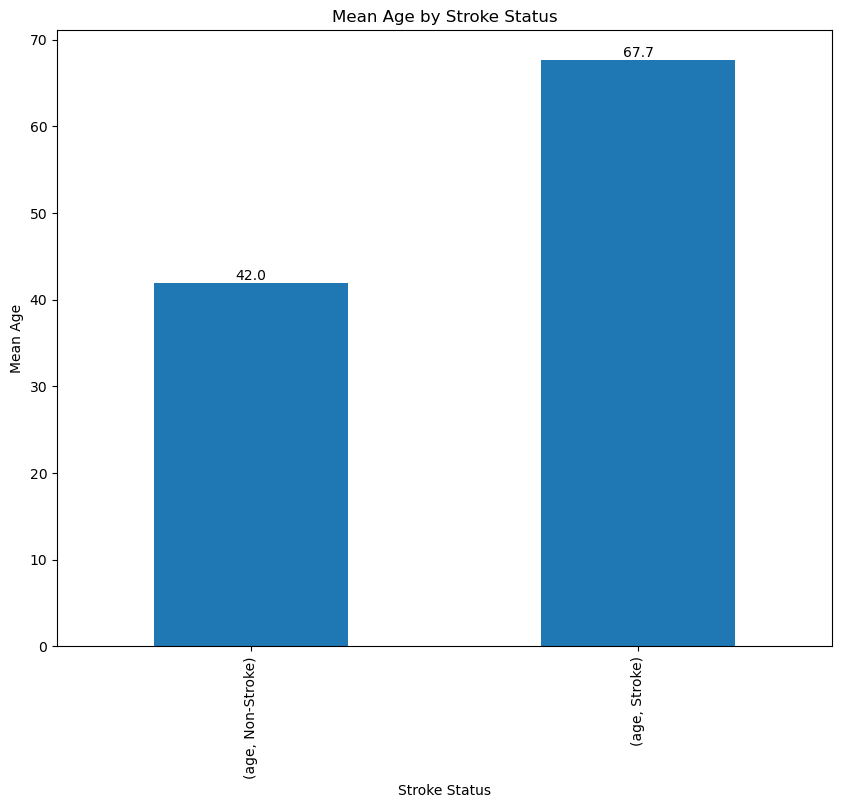

In [11]:
import matplotlib.pyplot as plt

# Compute mean age grouped by 'stroke' and rename labels
df_grouped = df.groupby(['stroke'])['age'].mean().to_frame().unstack()
df_grouped = df_grouped.rename(index={0: "Non-Stroke", 1: "Stroke"})  # Rename index

# Plot
ax = df_grouped.plot(kind='bar', stacked=False, figsize=(10,8))

# Add labels
ax.set_xlabel("Stroke Status")  # X-axis label
ax.set_ylabel("Mean Age")  # Y-axis label
ax.set_title("Mean Age by Stroke Status")  # Title

# Show values on bars
for container in ax.containers:
    ax.bar_label(container, fmt="%.1f")  

plt.show()


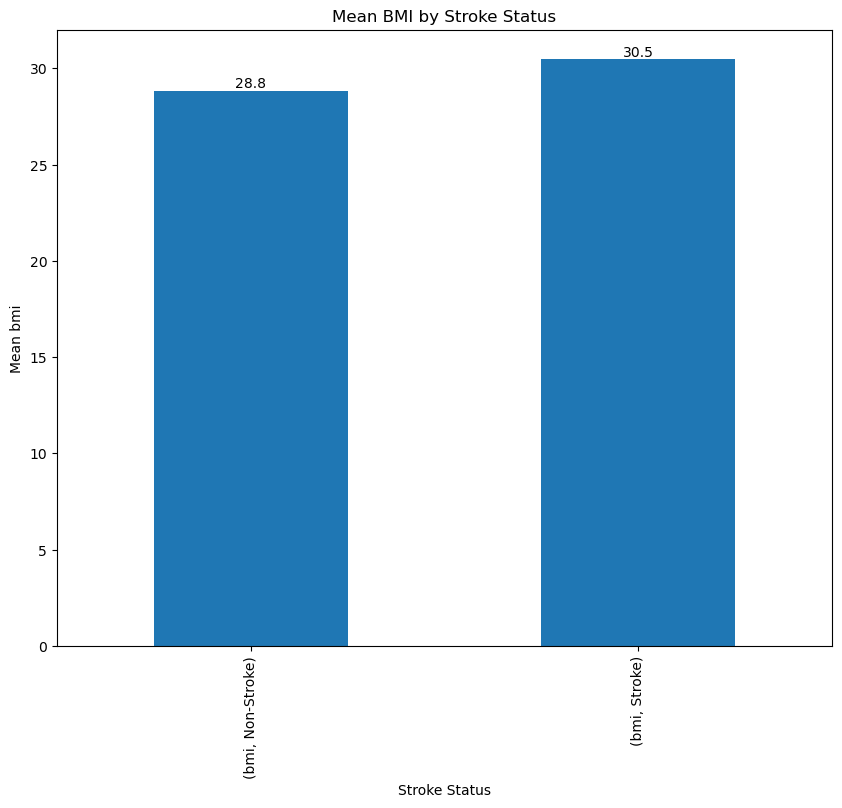

In [12]:
import matplotlib.pyplot as plt

# Compute mean bmi grouped by 'stroke' and rename labels
df_grouped = df.groupby(['stroke'])['bmi'].mean().to_frame().unstack()
df_grouped = df_grouped.rename(index={0: "Non-Stroke", 1: "Stroke"})  # Rename index

# Plot
ax = df_grouped.plot(kind='bar', stacked=False, figsize=(10,8))

# Add labels
ax.set_xlabel("Stroke Status")  # X-axis label
ax.set_ylabel("Mean bmi")  # Y-axis label
ax.set_title("Mean BMI by Stroke Status")  # Title

# Show values on bars
for container in ax.containers:
    ax.bar_label(container, fmt="%.1f")  

plt.show()


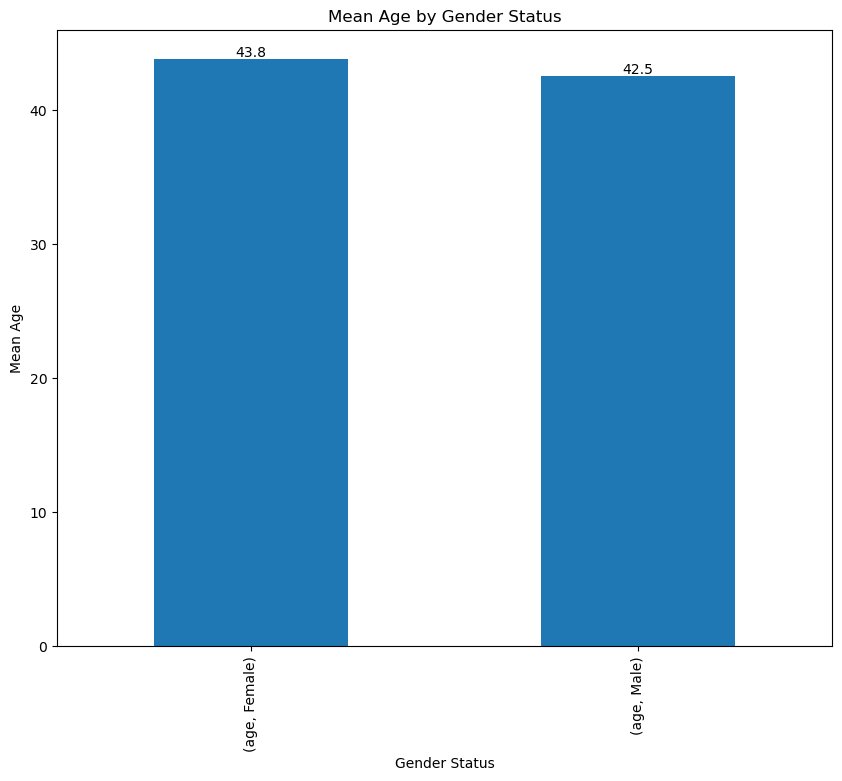

In [13]:
import matplotlib.pyplot as plt

# Compute mean age grouped by 'Gender' and rename labels
df_grouped = df.groupby(['gender'])['age'].mean().to_frame().unstack()
##df_grouped = df_grouped.rename(index={0: "Non-Stroke", 1: "Stroke"})  # Rename index

# Plot
ax = df_grouped.plot(kind='bar', stacked=False, figsize=(10,8))

# Add labels
ax.set_xlabel("Gender Status")  # X-axis label
ax.set_ylabel("Mean Age")  # Y-axis label
ax.set_title("Mean Age by Gender Status")  # Title

# Show values on bars
for container in ax.containers:
    ax.bar_label(container, fmt="%.1f")  

plt.show()

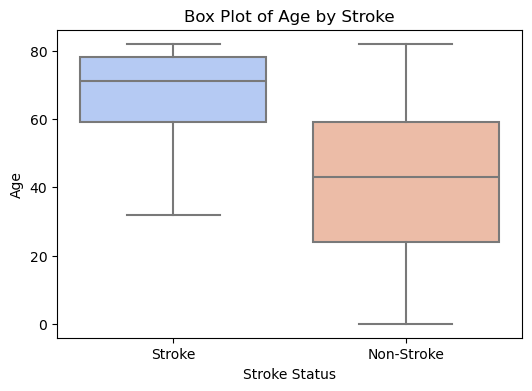

In [14]:
df['stroke_label'] = df['stroke'].replace({0: 'Non-Stroke', 1: 'Stroke'})

plt.figure(figsize=(6,4))
sns.boxplot(x='stroke_label', y='age', data=df, palette='coolwarm',showfliers=False)

plt.title("Box Plot of Age by Stroke")
plt.xlabel("Stroke Status")
plt.ylabel("Age")

plt.show()


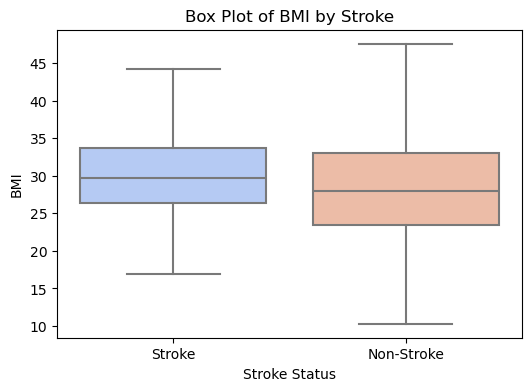

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

df['stroke_label'] = df['stroke'].replace({0: 'Non-Stroke', 1: 'Stroke'})

plt.figure(figsize=(6,4))
sns.boxplot(x='stroke_label', y='bmi', data=df, palette='coolwarm', showfliers=False)  # Hide outliers

plt.title("Box Plot of BMI by Stroke")
plt.xlabel("Stroke Status")
plt.ylabel("BMI")

plt.show()


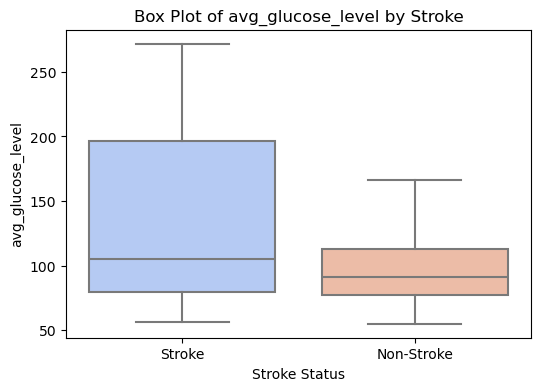

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

df['stroke_label'] = df['stroke'].replace({0: 'Non-Stroke', 1: 'Stroke'})

plt.figure(figsize=(6,4))
sns.boxplot(x='stroke_label', y='avg_glucose_level', data=df, palette='coolwarm', showfliers=False)  # Hide outliers

# Calculate mean values for each group
means = df.groupby('stroke_label')['avg_glucose_level'].mean()

#sns.pointplot(x='stroke_label', y='avg_glucose_level', data=df, estimator='mean', color='black', markers='D', join=False, errorbar=None)
for i, mean in enumerate(means):
    ax.text(i, mean, f'Mean: {mean:.1f}', ha='center', va='bottom', fontsize=10, color='black', fontweight='bold')


plt.title("Box Plot of avg_glucose_level by Stroke")
plt.xlabel("Stroke Status")
plt.ylabel("avg_glucose_level")

plt.show()


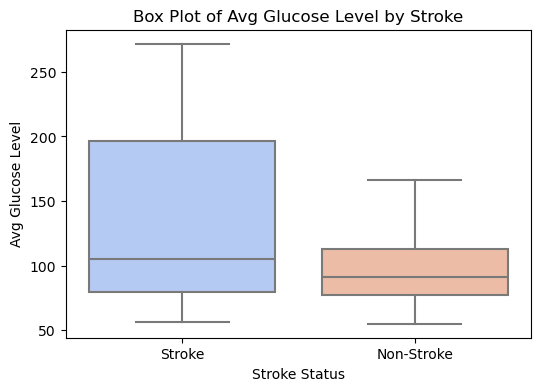

In [17]:
plt.figure(figsize=(6,4))
ax = sns.boxplot(x='stroke_label', y='avg_glucose_level', data=df, palette='coolwarm', showfliers=False)

# Calculate mean values for each group
#means = df.groupby('stroke_label')['avg_glucose_level'].mean()

# Annotate mean values on the plot
#for i, mean in enumerate(means):
    #ax.text(i, mean, f'Mean: {mean:.1f}', ha='center', va='bottom', fontsize=10, color='black', fontweight='bold')

plt.title("Box Plot of Avg Glucose Level by Stroke")
plt.xlabel("Stroke Status")
plt.ylabel("Avg Glucose Level")

plt.show()


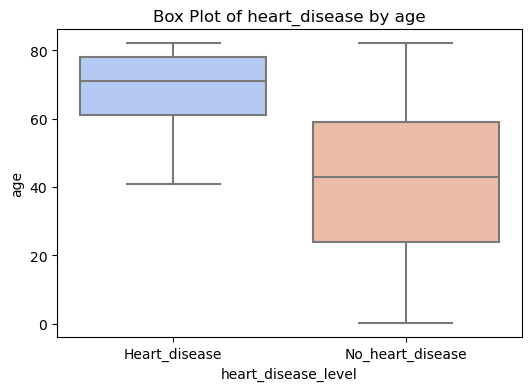

In [18]:
df['heart_disease_level'] = df['heart_disease'].replace({0: 'No_heart_disease', 1: 'Heart_disease'})

plt.figure(figsize=(6,4))
ax = sns.boxplot(x='heart_disease_level', y='age', data=df, palette='coolwarm', showfliers=False)

# Calculate mean values for each group
#means = df.groupby('heart_disease')['age'].mean()

# Annotate mean values on the plot
#for i, mean in enumerate(means):
    #ax.text(i, mean, f'Mean: {mean:.1f}', ha='center', va='bottom', fontsize=10, color='black', fontweight='bold')

plt.title("Box Plot of heart_disease by age")
plt.xlabel("heart_disease_level")
plt.ylabel("age")

plt.show()